In [42]:
from glob import glob
import pandas as pd
import imageio as iio
import matplotlib.pyplot as plt
import numpy as np
import itertools
from skan.csr import skeleton_to_csgraph, make_degree_image, pixel_graph, Skeleton
from skan import Skeleton, summarize, draw
from skan.pre import threshold
from skimage import io, feature

import skimage.morphology as sk
from skimage.segmentation import find_boundaries
from skimage.filters import rank
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import networkx as nx
import os
from scipy import optimize


from source import segmentation_hand
from utils import fileio
from utils import handtrace
from utils import matrices
from utils import geometry
from utils import mechanics
from utils import visualise


In [2]:
def fit( x, y):
        """
        Fit a circular arc to a list of co-ordinates
        -----------
        Parameters
        -----------
        x, y
        """

        def calc_R(xc, yc):
            """ calculate the distance of each 2D points from the center (xc, yc) """
            return np.sqrt((x - xc) ** 2 + (y - yc) ** 2)

        def f_2(c):
            """ calculate the algebraic distance between the data points and the mean circle centered at c=(xc, yc) """
            ri = calc_R(*c)
            return ri - ri.mean()

        x_m = np.mean(x)
        y_m = np.mean(y)

        center_estimate = x_m, y_m
        center_2, ier = optimize.leastsq(f_2, center_estimate)

        xc_2, yc_2 = center_2
        ri_2 = calc_R(*center_2)
        r_2 = ri_2.mean()
        residu_2 = np.sum((ri_2 - r_2) ** 2)

        theta1 = np.rad2deg(np.arctan2(y[np.argmax(x)] - yc_2, x[np.argmax(x)] - xc_2))  # starting angle
        theta2 = np.rad2deg(np.arctan2(y[np.argmin(x)] - yc_2, x[np.argmin(x)] - xc_2))

        return r_2, xc_2, yc_2, residu_2

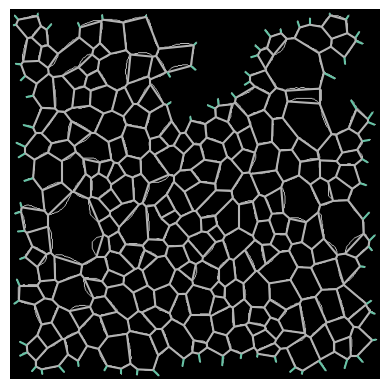

In [19]:
#folder='C:\\Users\\v35431nc\\Documents\\Lab Stuff\\Nawseen Traces'
folder='C:\\Users\\v35431nc\\Documents\\Lab_Stuff\\\TracesforNawseen/'
files = glob(folder+'\\*_trace.tif')
#files = glob(folder+'\\20230330_GFP_Tubulin_NuMA_MO_1.S+1.L_0p5_biaxial_stretch(2)_max projection_first frame_trace_junctions_inverted.tif')
trace_name=files[1].split('\\')[-1].split('.t')[0]
image0 = iio.v2.imread(files[1])
#skeletonise and segment edges
im, data=segmentation_hand.skeletonise(files[1], cp=False, smooth=True)
#remove spiderlegs/contractible branches
draw.overlay_euclidean_skeleton_2d(im,data,
                                   skeleton_color_source='branch-type', skeleton_colormap='Set2');
edge_verts, n_coords=segmentation_hand.extract_edges_verts(data)




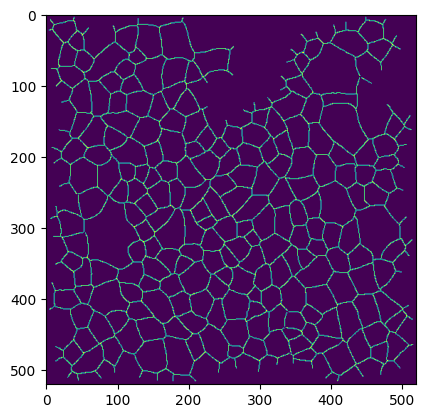

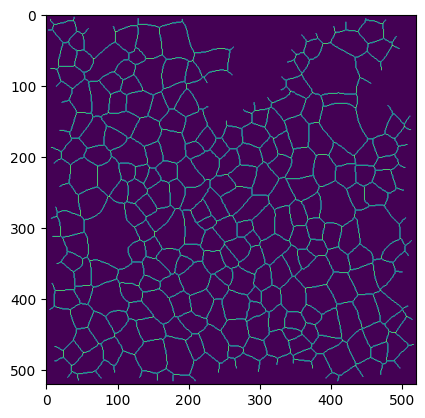

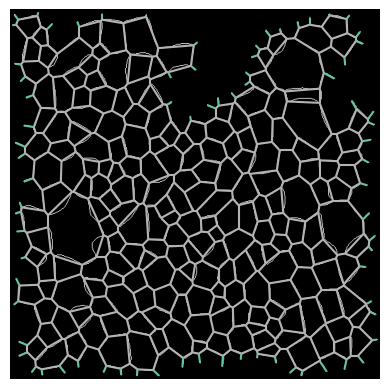

In [34]:
    image = image0
    # Set all active pixels to have value 1.
   
    image[image < np.mean(image[image > 0])/4] = 0
    image[image > 0] = 1

    image=sk.white_tophat(image)
    plt.imshow(image)
    plt.show()
    image = threshold(image, sigma=1, radius=int((image.shape[0])/5))
    image = sk.skeletonize(image, method='lee')
    plt.imshow(image)
    data = summarize(Skeleton(image))
    im=image
    draw.overlay_euclidean_skeleton_2d(image,data,
                                   skeleton_color_source='branch-type', skeleton_colormap='Set2');


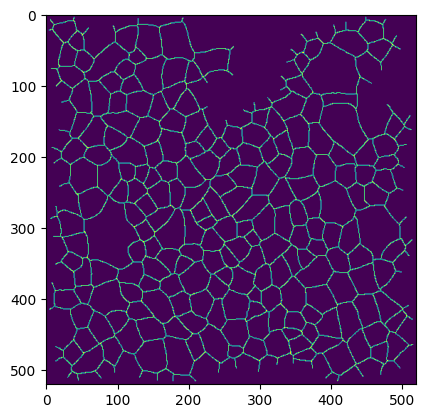

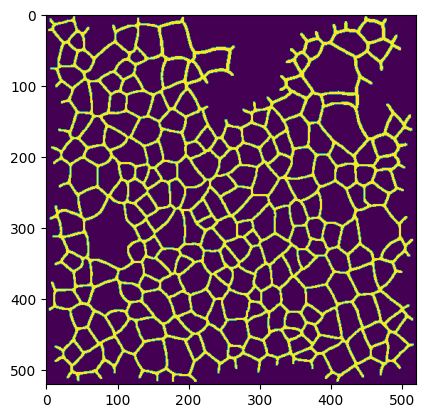

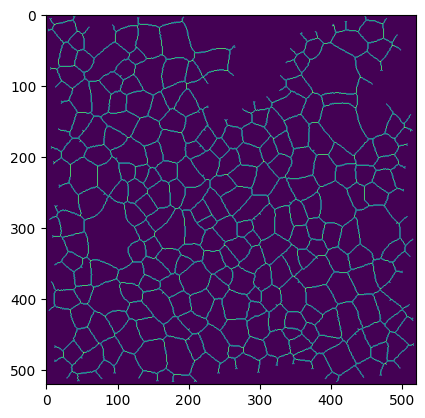

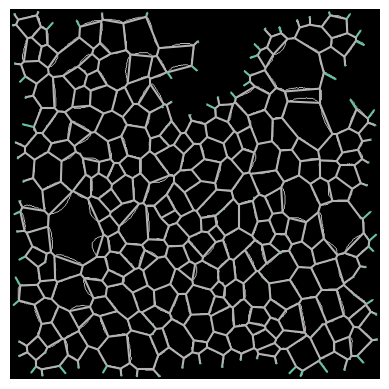

In [26]:
    image = image0
    # Set all active pixels to have value 1.
   
    image[image < np.mean(image[image > 0])/4] = 0
    image[image > 0] = 1

    smooth=False

    if smooth:
 
        #image=sk.binary_dilation(image, footprint=[[0, 0, 1], [0, 1, 0], [1, 0, 0]])
        #image=sk.binary_dilation(image, footprint=[[1, 0, 0], [0, 1, 0], [0, 0, 1]])
        image = sk.binary_dilation(image)
   
    plt.imshow(image)

    plt.show()

    image = sk.binary_closing(image)
    image = threshold(image, sigma=1, radius=int((image.shape[0])/5))
    plt.imshow(image)
    plt.show()

    if smooth:
        image = sk.skeletonize(image, method='lee')
    if not smooth:
        image = sk.medial_axis(image, return_distance=False)
    
    plt.imshow(image)

    pixel_graph, coordinates = skeleton_to_csgraph(image)
    data = summarize(Skeleton(image))
    draw.overlay_euclidean_skeleton_2d(image,data,
                                   skeleton_color_source='branch-type', skeleton_colormap='Set2');
  

False

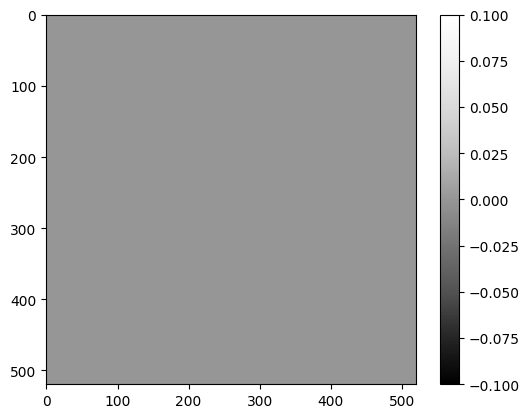

In [49]:
image= feature.canny(image0, sigma=3)
g=plt.imshow(image, cmap='Greys_r')
plt.colorbar(g)
image.max()

In [22]:
data = summarize(Skeleton(image))

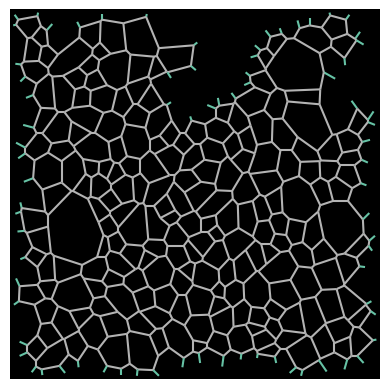

In [23]:
draw.overlay_euclidean_skeleton_2d(image,data,
                                   skeleton_color_source='branch-type', skeleton_colormap='Set2');
edge_verts, n_coords=segmentation_hand.extract_edges_verts(data)


In [71]:
edge_verts, n_coords=segmentation_hand.extract_edges_verts(data)


In [13]:
n_coords

array([[  6,  38],
       [  8,  60],
       [ 11,  92],
       [ 15,  29],
       [ 16,  66],
       [ 22, 127],
       [ 24,  97],
       [ 31, 109],
       [ 32,  39],
       [ 35,  66],
       [ 35, 140],
       [ 39,  78],
       [ 40,  59],
       [ 53,  26],
       [ 57,  79],
       [ 59, 114],
       [ 62, 134],
       [ 64,  51],
       [ 66, 128],
       [ 67,  38],
       [ 69,  95],
       [ 72,  59],
       [ 85,  23],
       [ 85, 128],
       [ 86,  58],
       [ 89,  96],
       [ 98,  25],
       [ 98, 117],
       [102,  36],
       [104,  74],
       [109, 118],
       [113,  74],
       [121,  82],
       [122,  51],
       [122, 104],
       [128, 140],
       [134,  50],
       [139, 116],
       [140,  75],
       [141,  42],
       [142, 128],
       [143, 130],
       [146, 114],
       [155,  86],
       [158,  44],
       [158, 101],
       [164,  83],
       [165, 102],
       [167, 143],
       [174,  73],
       [177, 139],
       [181, 117]], dtype=int64

In [72]:
N_p=Skeleton(im).n_paths

circ_fit=np.zeros((N_p, 6))


for i in range(N_p):
    
    s=Skeleton(im).coordinates[Skeleton(im).paths_list()[i]]
    x=s[:,1]
    y=s[:,0]
    circ_fit[i, :4]=fit(x, y)
    x1, y1, x2, y2 = x[0], y[0], x[-1], y[-1]
    v1 = [x1 -circ_fit[-1, 1], y1 - circ_fit[-1, 2]]
    v2 = [x2 - circ_fit[-1, 1], y2 - circ_fit[-1, 2]]

    circ_fit[i, 4] = np.cross(v1, v2)
    circ_fit[i, 5]= 0.5 * np.linalg.norm(np.subtract([x2, y2], [x1, y1]))  # dist to midpoint



In [73]:
data['edge_rad']=circ_fit[:,0]
data['xc']=circ_fit[:,1]
data['yc']=circ_fit[:,2]
data['circ_res']=circ_fit[:,3]
data['cross']=circ_fit[:,4]
data['dist_mid']=circ_fit[:,5]
data

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,...,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance,edge_rad,xc,yc,circ_res,cross,dist_mid
0,0,0,22,14.656854,1,1.0,0.0,11,109,24,...,109,24,113,13.601471,106522.575760,102257.314068,-30202.493720,1.035150e+00,1373.000000,6.800735
1,0,5,55,17.142136,1,1.0,0.0,15,147,28,...,147,28,137,16.401219,645.529243,-369.701980,-372.094135,6.757257e-01,2061.000000,8.200610
2,0,22,55,25.656854,2,1.0,0.0,24,113,28,...,113,28,137,24.331050,186933.423168,25811.249541,-185134.578233,2.470054e+00,-124.000000,12.165525
3,0,22,125,20.384776,2,1.0,0.0,24,113,39,...,113,39,100,19.849433,71.264084,159.642295,78.014533,4.466006e-01,2007.000000,9.924717
4,0,53,59,2.000000,1,1.0,0.0,28,71,30,...,71,30,71,2.000000,10626.786153,10697.786122,28.999984,1.475859e-09,142.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0,1128,1197,11.071068,1,1.0,0.0,172,37,181,...,37,181,32,10.295630,23.565702,55.121460,186.857768,5.855698e-01,1193.000000,5.147815
80,0,1138,1209,22.142136,2,1.0,0.0,173,107,183,...,107,183,125,20.591260,48574.578757,22898.104870,-42722.908382,1.308981e+00,-2044.000000,10.295630
81,0,1138,1192,16.899495,2,1.0,0.0,173,107,180,...,107,180,93,15.652476,105.476049,53.057186,82.469336,9.743898e-01,3171.000000,7.826238
82,0,1192,1221,9.828427,1,1.0,0.0,180,93,189,...,93,189,91,9.219544,48448.924492,47154.581563,11692.345901,7.096298e-01,1197.000000,4.609772


In [74]:
data.to_csv("DLITE_test_data_fr001.csv")

In [80]:
    data_internal=data[data['branch-type']==2] #do we also need to split out sub skeletons for disconnected traces? We also want to identify holes by number of cycles compared to Nc, if cycles < Nc then there is a hole and can't get matrices.
    data_int=data_internal.drop_duplicates().reset_index(drop=True)

In [81]:
data[data.edge_rad==np.min(abs(data_int.edge_rad))]

,skeleton-id,node-id-src,node-id-dst,branch-distance,branch-type,mean-pixel-value,stdev-pixel-value,image-coord-src-0,image-coord-src-1,image-coord-dst-0,...,coord-src-1,coord-dst-0,coord-dst-1,euclidean-distance,edge_rad,xc,yc,circ_res,cross,dist_mid
8,0,130,202,9.828427,2,1.0,0.0,40,82,49,...,82,49,84,9.219544,2.588482,83.000185,44.499993,21.497613,658.0,4.609772
